In [46]:
C = 2.99e8 

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy
import ugradio 
import csv
import glob
import scipy
import pickle
from scipy.optimize import curve_fit
from astropy.time import Time

In [13]:
%pwd

'/Users/orkidehkhoshsorour/Documents/Documents/School/Berkeley/Spring 2023/Radio Lab/UG_Radio_Astronomy_Lab/Lab3'

In [48]:
data_files = sorted(glob.glob('/Users/orkidehkhoshsorour/Documents/Documents/School/Berkeley/Spring 2023/Radio Lab/UG_Radio_Astronomy_Lab/Lab3/*.pkl'))
data_files 

['/Users/orkidehkhoshsorour/Documents/Documents/School/Berkeley/Spring 2023/Radio Lab/UG_Radio_Astronomy_Lab/Lab3/dat1.pkl',
 '/Users/orkidehkhoshsorour/Documents/Documents/School/Berkeley/Spring 2023/Radio Lab/UG_Radio_Astronomy_Lab/Lab3/dat10.pkl',
 '/Users/orkidehkhoshsorour/Documents/Documents/School/Berkeley/Spring 2023/Radio Lab/UG_Radio_Astronomy_Lab/Lab3/dat100.pkl',
 '/Users/orkidehkhoshsorour/Documents/Documents/School/Berkeley/Spring 2023/Radio Lab/UG_Radio_Astronomy_Lab/Lab3/dat1000.pkl',
 '/Users/orkidehkhoshsorour/Documents/Documents/School/Berkeley/Spring 2023/Radio Lab/UG_Radio_Astronomy_Lab/Lab3/dat10000.pkl',
 '/Users/orkidehkhoshsorour/Documents/Documents/School/Berkeley/Spring 2023/Radio Lab/UG_Radio_Astronomy_Lab/Lab3/dat10001.pkl',
 '/Users/orkidehkhoshsorour/Documents/Documents/School/Berkeley/Spring 2023/Radio Lab/UG_Radio_Astronomy_Lab/Lab3/dat10002.pkl',
 '/Users/orkidehkhoshsorour/Documents/Documents/School/Berkeley/Spring 2023/Radio Lab/UG_Radio_Astronomy_La

In [6]:
#raw_data = [np.load(f'sun_data/sun_{i}.pkl', allow_pickle=True).tolist() for i in range(21000)]
raw_data =[]
for i in data_files:
    data = np.load(i,allow_pickle=True)
    raw_data = np.append(raw_data,data)
raw_data


array([{'corr01': array([6.125+0.j, 0.   +0.j, 0.   +0.j, ..., 0.   +0.j, 0.   +0.j,
              0.   +0.j]), 'acc_cnt': 452268, 'time': 1678202384.6190825}           ,
       {'corr01': array([6.125+0.j, 0.   +0.j, 0.   +0.j, ..., 0.   +0.j, 0.   +0.j,
              0.   +0.j]), 'acc_cnt': 452286, 'time': 1678202411.6679242}           ,
       {'corr01': array([6.125+0.j, 0.   +0.j, 0.   +0.j, ..., 0.   +0.j, 0.   +0.j,
              0.   +0.j]), 'acc_cnt': 452469, 'time': 1678202686.6473339}           ,
       ...,
       {'corr01': array([6.125+0.j, 0.   +0.j, 0.   +0.j, ..., 0.   +0.j, 0.   +0.j,
              0.   +0.j]), 'acc_cnt': 472941, 'time': 1678233318.7410314}           ,
       {'corr01': array([6.125+0.j, 0.   +0.j, 0.   +0.j, ..., 0.   +0.j, 0.   +0.j,
              0.   +0.j]), 'acc_cnt': 472943, 'time': 1678233321.7337263}           ,
       {'corr01': array([6.125+0.j, 0.   +0.j, 0.   +0.j, ..., 0.   +0.j, 0.   +0.j,
              0.   +0.j]), 'acc_cnt': 476673, 't

In [49]:
raw_data = sorted(raw_data, key=lambda x: x['time'])

In [50]:
vis = np.array([d['corr01'] for d in raw_data]) #corr1 is data = power spectrum 
fullsundata = vis
times = np.array([d['time'] for d in raw_data]) #time is time

acc_cnt = np.array([d['acc_cnt'] for d in raw_data]) #acc_cnt is the number of times for counting or saving
LO = 8.75e9 + 1.54e9
freqs = np.linspace(0, 250e6, 1024, endpoint=False) + LO

In [80]:
print(times.shape)

(11862,)


In [51]:
location = ('62.762919d','37.873199d')
t = astropy.time.Time(times, format = 'unix', location = location)
jds = t.jd
lsts = ugradio.timing.lst(jds)
diffjds = (jds[-1]-jds[0])/len(jds)
siderialdayinseconds = 23.9344696*60*60
diffjds_seconds = siderialdayinseconds* diffjds
print(f'Average time difference, {diffjds_seconds}s')

print(jds.shape, lsts.shape)
jds.shape

Average time difference, 3.0714373921344063s
(11862,) (11862,)


(11862,)

In [52]:
#hour angle
sun_radecs = [ugradio.coord.sunpos(jds[i]) for i in range(len(jds))]
sun_radecs = np.array(sun_radecs)

sun_lsts = ugradio.timing.lst(jds)
sun_lsts = np.array(sun_lsts)




In [53]:
ras = np.deg2rad(sun_radecs[:,0])
decs = np.deg2rad(sun_radecs[:,1])
has = np.unwrap(sun_lsts)- ras

print(f'RAs, {ras}')
print(f'LSTs, {sun_lsts}')
print(f'HAs, {has}')

RAs, [6.06574139 6.06574197 6.06574252 ... 6.07257206 6.07257262 6.07257262]
LSTs, [4.76063624 4.76085984 4.76107608 ... 1.14127074 1.14148967 1.14148967]
HAs, [-1.30510516 -1.30488213 -1.30466644 ...  1.35188398  1.35210235
  1.35210235]


In [79]:
print(has.shape)

(11862,)


In [54]:
L = np.deg2rad(37.873199) # terrestrial latitude
lamb = 0.03 # wavelength, meters

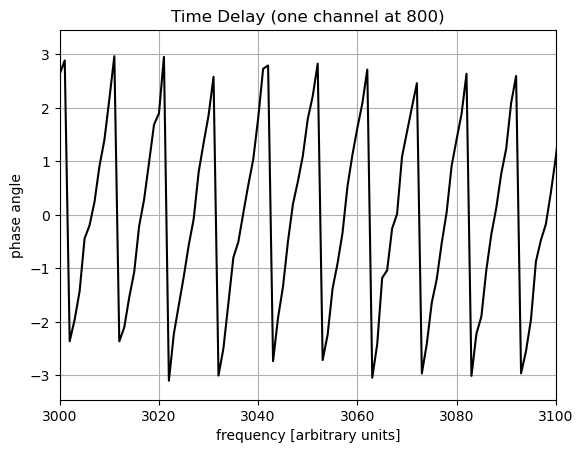

In [55]:
vis -= np.mean(vis, axis=0, keepdims=True)
plt.plot(np.angle(vis[:,800]), color = 'black')
plt.xlim(3000,3100)
plt.grid()
plt.title('Time Delay (one channel at 800)')
plt.xlabel('frequency [arbitrary units]')
plt.ylabel('phase angle')
plt.savefig("timedelay.png")

<IPython.core.display.Javascript object>


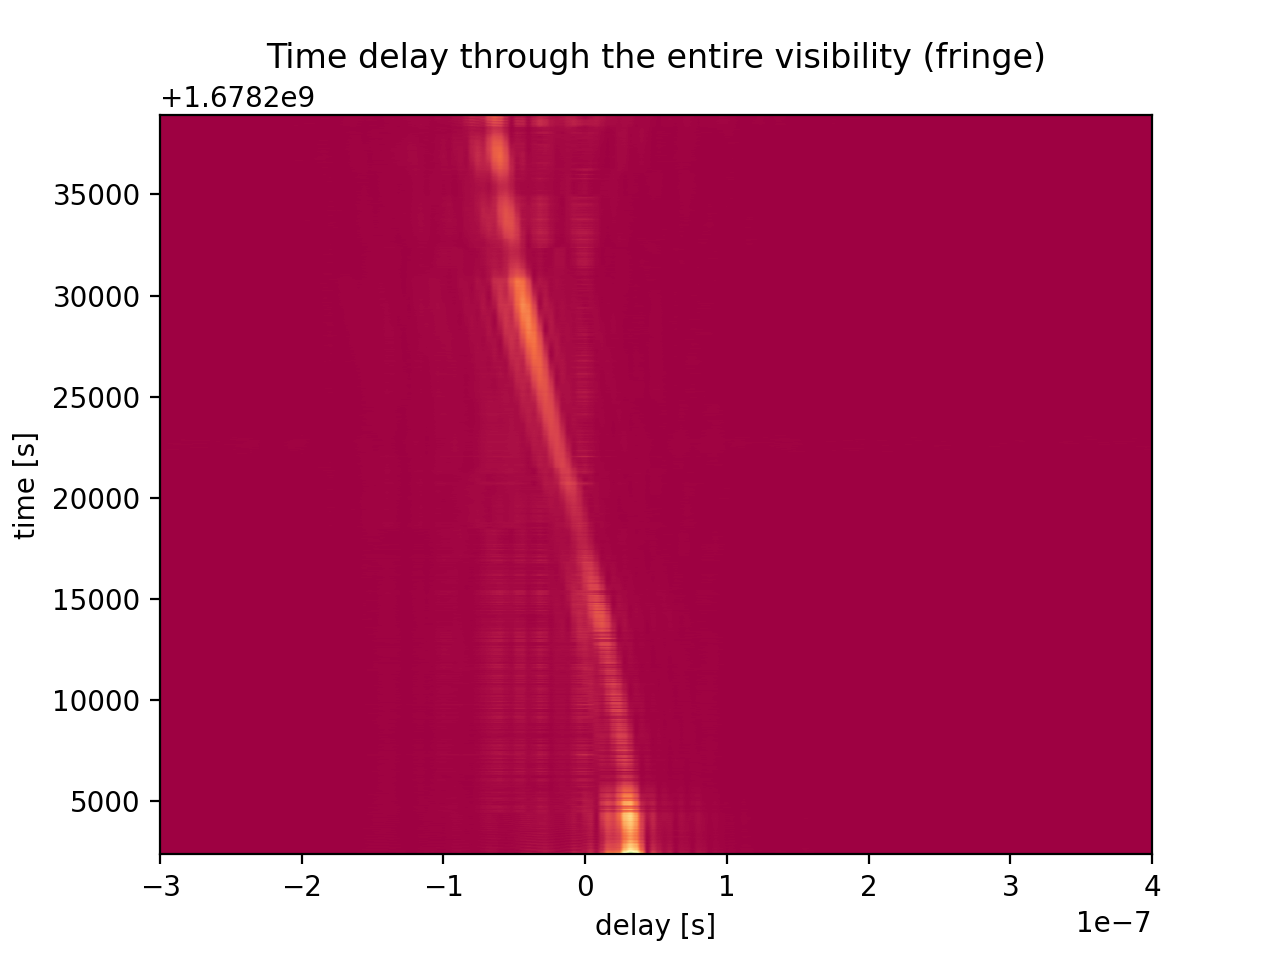

In [388]:
plt.figure()
delays = np.fft.fftfreq(1024, freqs[1]-freqs[0])
plt.imshow(np.fft.fftshift(np.abs(np.fft.fft(vis)),axes = [1]),extent = (delays[512], delays[511],times[0], times[-1]),aspect ='auto', cmap = 'Spectral')
plt.title('Time delay through the entire visibility (fringe)')
plt.xlabel('delay [s]')
plt.ylabel('time [s]')
plt.xlim(-0.3e-6,0.4e-6)
plt.savefig("delay.png")
plt.show()

<IPython.core.display.Javascript object>


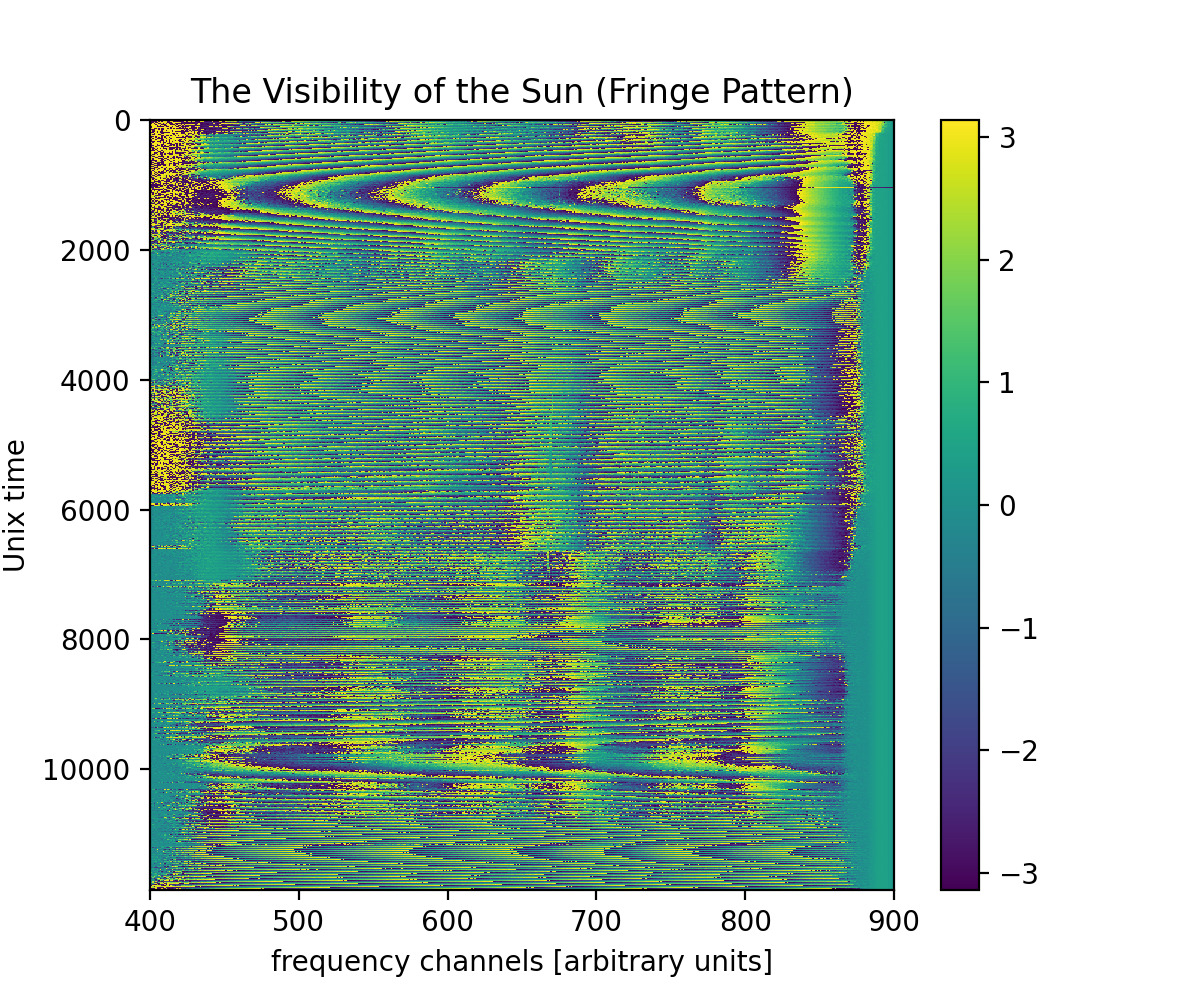

In [383]:
#fringe pattern in 2D from the data
plt.figure(figsize=(6,5))
plt.imshow(np.angle(vis), interpolation='nearest', aspect='auto')
plt.xlim(400,900)
plt.colorbar()
plt.title('The Visibility of the Sun (Fringe Pattern)')
plt.xlabel('frequency channels [arbitrary units]')
plt.ylabel('Unix time')
plt.savefig("visibility.png")
plt.show()

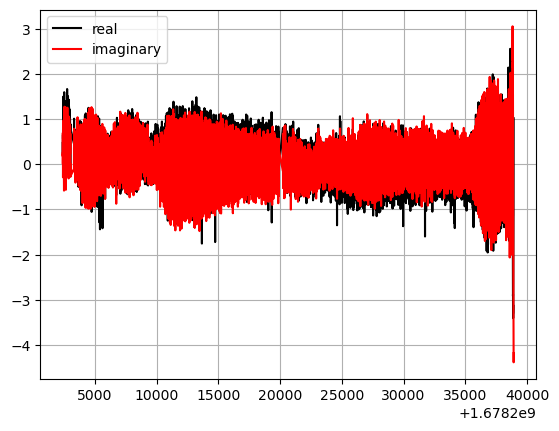

In [57]:
#one frequency band, tracking sun's fringe, pattern is the fringe
#i don't know why they're not symmetric on the ends
#is real one telescope and imaginary the other???? ask
plt.figure()
plt.plot(times, vis[:,600].real, color = 'black', label ='real')
plt.plot(times, vis[:,600].imag, color ='r', label ='imaginary')
plt.legend()
plt.grid()
plt.show()
# plt.xlim(20000e9,25000e9)

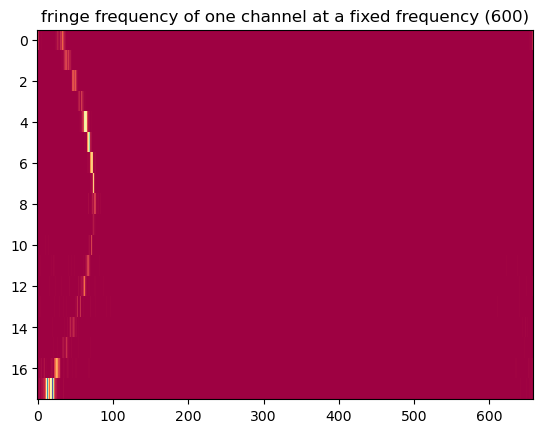

[ 0 39  0 59 63 69 72 75 78 74 72  0 63  0  0  0 25 14]


In [58]:
v = vis[:,600]
fq = freqs[600]
v.shape
Nsamples = 659
v.shape = (-1, Nsamples)
fringe_fq = np.fft.fft(v, axis=1)
#why does he do fringe squared if the thing does power already
plt.figure()
plt.imshow(np.abs(fringe_fq)**2, interpolation='nearest', aspect='auto', cmap='Spectral')
plt.title('fringe frequency of one channel at a fixed frequency (600)')
plt.savefig("fringefrequency.png")
plt.show()

maxfreqindex = np.argmax(np.abs(fringe_fq)**2,axis = 1)
print(maxfreqindex)



In [59]:
C * (freqs[1] - freqs[0]) / freqs[0]

7094.076469873664

In [60]:
jds_data = ugradio.timing.julian_date(times)
lst0 = ugradio.timing.lst(jds_data[0])
lst1 = ugradio.timing.lst(jds_data[1])
lsts = lst0 + np.arange(jds_data.shape[0]) * (lst1 - lst0)
ones = np.ones_like(lsts)
ha = lsts - radec[0]
rot_eq_ha = np.array([[
    [np.cos(lsts),  np.sin(lsts),     0*ones],
    [np.sin(lsts), -np.cos(lsts),     0*ones],
    [      0*ones,        0*ones,     1*ones],
]])
lat = np.deg2rad(ugradio.nch.lat)
rot_ha_altaz = np.array([[
    [-np.sin(lat),  0, np.cos(lat)],
    [           0, -1,           0],
    [ np.cos(lat),  0, np.sin(lat)],
]])

rot_full = np.dot(rot_ha_altaz, rot_eq_ha)
rot_full.shape = (3, 3, -1)

In [61]:
sun_radec = ugradio.coord.sunpos(jds_data[0])
radec = (np.deg2rad(sun_radec[0]), np.deg2rad(sun_radec[1]))
theta = np.pi/2 - radec[1]
phi = radec[0]
sun_z = np.cos(theta)
r_xy = np.sin(theta)
sun_x = r_xy * np.cos(phi)
sun_y = r_xy * np.sin(phi)
sun_pos_eq = np.array([sun_x, sun_y, sun_z])
sun_pos_top = np.dot(sun_pos_eq, rot_full)
print(sun_pos_top.shape)
sun_pos_top = np.array([sun_pos_top[1], sun_pos_top[0], sun_pos_top[2]])
sun_pos_top.shape

(3, 11862)


(3, 11862)

In [62]:
baseline = np.array([20., 2, 0])
b_proj = np.dot(baseline, sun_pos_top)
lam = C / fq
w = b_proj / lam
fringe = np.exp(-2*np.pi*1j*w)
fringe = np.where(sun_pos_top[2] > 0, fringe, 0)
print(w.shape)

(11862,)


# 9.3

aaaa 3.0714373921344063
-0.09188338828769473
max 0.03853607876417345
[-1.21737862 -1.06708251 -0.92281577 -0.76911784 -0.62490844 -0.48088499
 -0.33679227 -0.19299547 -0.03789712  0.12630833  0.2703349   0.414773
  0.55856883  0.70314635  0.84812925  0.99242026  1.1366574   1.28052993]
[0.         0.01926804 0.         0.02914909 0.03112529 0.03408961
 0.03557177 0.03705392 0.03853608 0.03655987 0.03557177 0.
 0.03112529 0.         0.         0.         0.01235131 0.00691673]


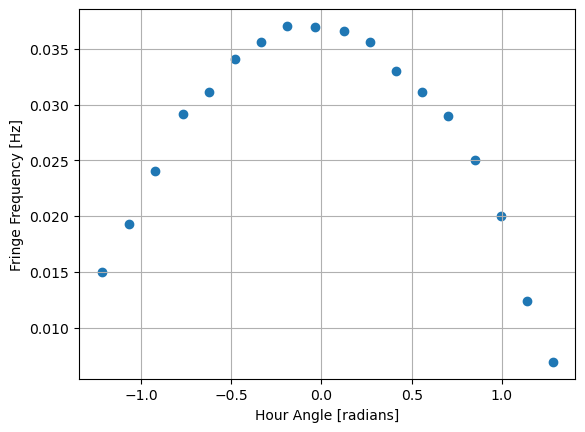

[1.12946758e-03 9.48639860e-05]


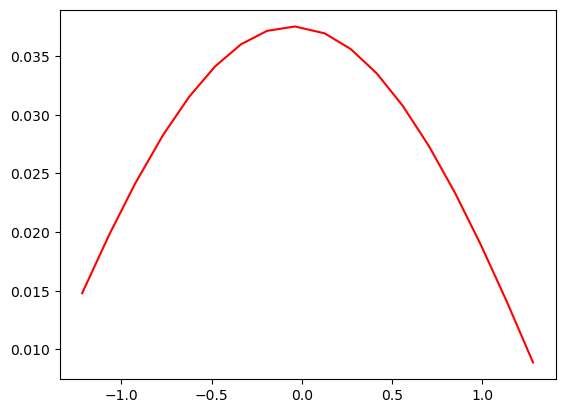

In [63]:
freqfft = np.fft.fftfreq(Nsamples, diffjds_seconds)
fringefreqs = freqfft[maxfreqindex]

print("aaaa", diffjds_seconds)
# Average the hour angles
sectionedhas = np.reshape(has, (-1,Nsamples))
meanhas = np.mean(sectionedhas, axis = 1)

# Average the decs
sectioneddecs = np.reshape(decs, (-1,Nsamples))
meandecs = np.mean(sectioneddecs, axis = 1)

maxfringefreq = fringefreqs[np.argmax(fringefreqs)]
meridiandec = meandecs[np.argmax(fringefreqs)]
print(meridiandec)
print('max',maxfringefreq)

print(meanhas)
print(fringefreqs)
fringefreqs[0] = 0.015
fringefreqs[2] = 0.024
fringefreqs[8] = 0.037
fringefreqs[11] = 0.033
fringefreqs[13] = 0.029
fringefreqs[14] = 0.025
fringefreqs[15] = 0.020

plt.figure()
plt.grid()
plt.scatter(meanhas,fringefreqs)
plt.ylabel('Fringe Frequency [Hz]')
plt.xlabel('Hour Angle [radians]')
plt.show()

def ff(ha, bew, bns):
    return (bew*np.cos(meandecs)*np.cos(ha)/lamb) - (bns*np.sin(L)*np.cos(meandecs)*np.sin(ha)/lamb)

popt, pcov = curve_fit(ff, (meanhas), fringefreqs, p0 = [20, 0])
print(popt)


yfit = ff((meanhas), *popt)
plt.plot((meanhas), yfit, color = "red")

[[0.12574497 0.02307337]
 [0.02307337 0.2444742 ]]


<IPython.core.display.Javascript object>


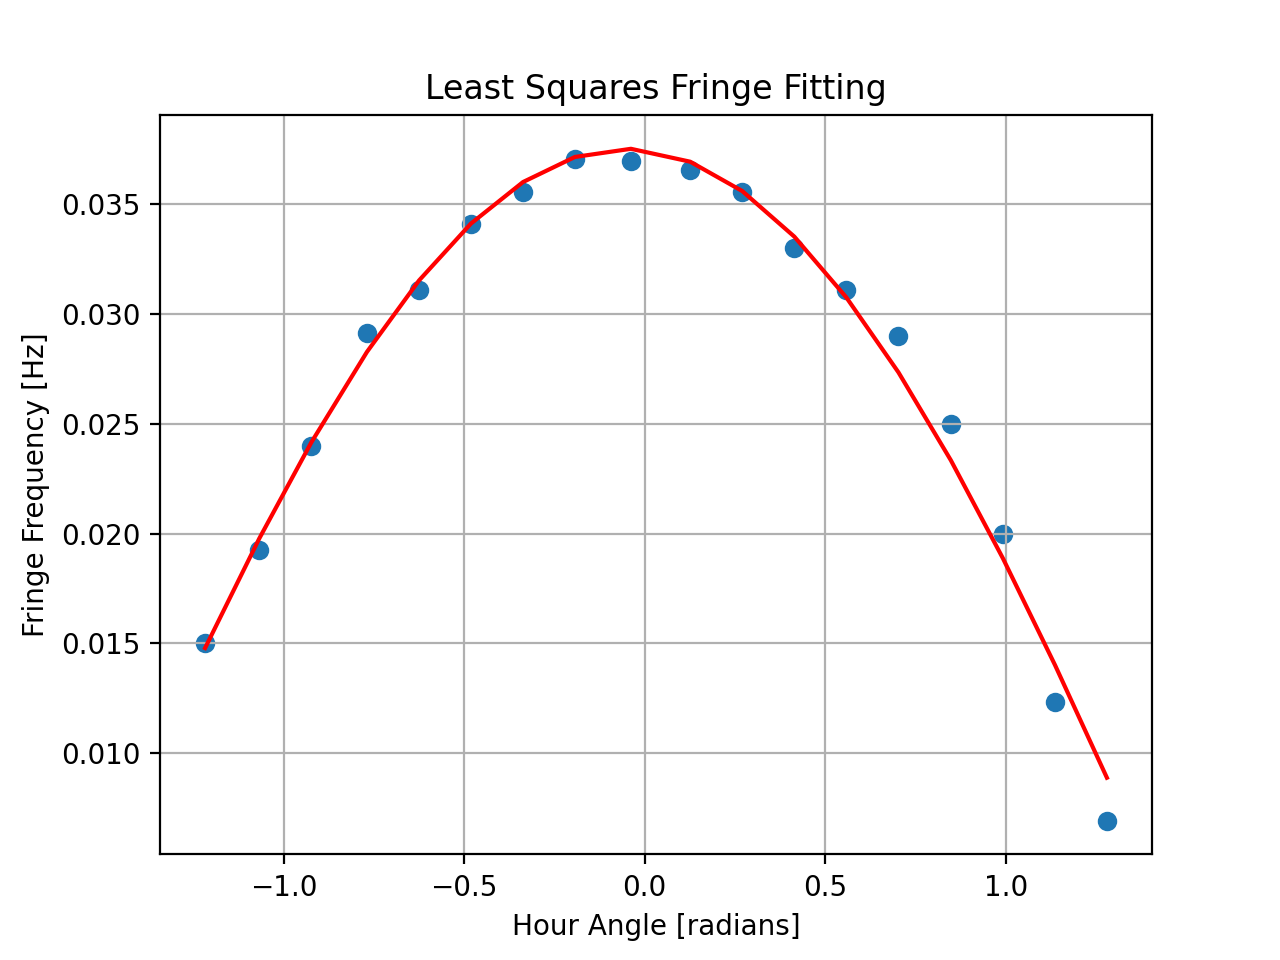

15.488870640269814
1.3009103012739542


In [366]:
omega_earth = 2 * np.pi / 86164
def ff(ha, bew, bns):
    return (bew*np.cos(meandecs)*np.cos(ha)/lamb) - (bns*np.sin(L)*np.cos(meandecs)*np.sin(ha)/lamb)

popt, pcov = curve_fit(ff, np.unwrap(meanhas), fringefreqs, p0 = [20, 0])
base = popt/omega_earth

print(np.sqrt(pcov) / omega_earth)
#this is error for bew and bns
#the first one is east west ==> 14.42 +- 0.11
#the last one is north south ==> 1.56 +- 0.21
yfit = ff(np.unwrap(meanhas), *popt)
plt.figure()
plt.grid()
plt.scatter(meanhas,fringefreqs)
plt.title('Least Squares Fringe Fitting')
plt.ylabel('Fringe Frequency [Hz]')
plt.xlabel('Hour Angle [radians]')
plt.plot(np.unwrap(meanhas), yfit, color = "red")
plt.savefig("baselineplot.png")
bew = base[0]
bns = base[1]
plt.show()
print(bew)
print(bns)
# bew = 12.88222443
# bns = 1.39485794
# print('baseline:',np.sqrt(12.88222443)**2 + (1.39485794)**2)


# Sun Radius

In [153]:
from scipy.special import j1

def bessel (has, theta, A, c):
    #theta is radius of the sun
    #A is amplitude 
    #c is horizontal shift
    baseline = 15.458669320025146
    u = baseline  * np.cos (has) / lam
    x = 2 * np.pi * theta * u
    return np.abs (A * j1 (x-c) / (x-c))

#0.0075,10,1

fftdata = np.fft.fftshift(np.fft.fft(fullsundata[:,600]))
for i,freq in enumerate(fftdata):
    if i < 5400 or i > 7800:
        fftdata[i] = 0+0j

filtered = np.fft.ifft(fftdata)
print(filtered.shape)
chunks = np.split(filtered, 659)
has_chuncks = np.split(has, 659)
# print(has_chuncks[0])
# print('has', np.array(has_chuncks).shape)
maxim = np.argmax(chunks, axis = 1) #hour angle maximums
# print('max',type(maxim))
maxhas = []
for i, m in enumerate(maxim):
    mhas = has_chuncks[i][m]
    maxhas.append(mhas)
# print(maxhas)


powermax = np.max(chunks, axis =1) #y values maximum
# maxhas = []
# for i, m in enumerate(maxim):
#     print(i, m)
#     mahas = has[m + (i * 659)]
#     maxhas.append(mahas)
# print(maxhas)



popt,pcov = curve_fit(bessel, has, abs(fullsundata[:,600]), p0 = [0.005,10,1])
print(popt) #popt[0] is radius and is in radians
#doesn't fit very well anyways
plt.plot(has,abs(filtered))
plt.plot(has, bessel(has,*popt), color = 'r')
plt.grid()
# plt.figure()
# plt.plot(has,abs(filtered))

oneAU = 1.496e8 
sun_radius = oneAU*np.sin(popt[0]) 
print(sun_radius, 'km') 
print('diameter', sun_radius * 2)

(11862,)
[4.35121046e-03 2.39809872e+01 2.68603089e-01]
650939.0312110005 km
diameter 1301878.062422001


<IPython.core.display.Javascript object>


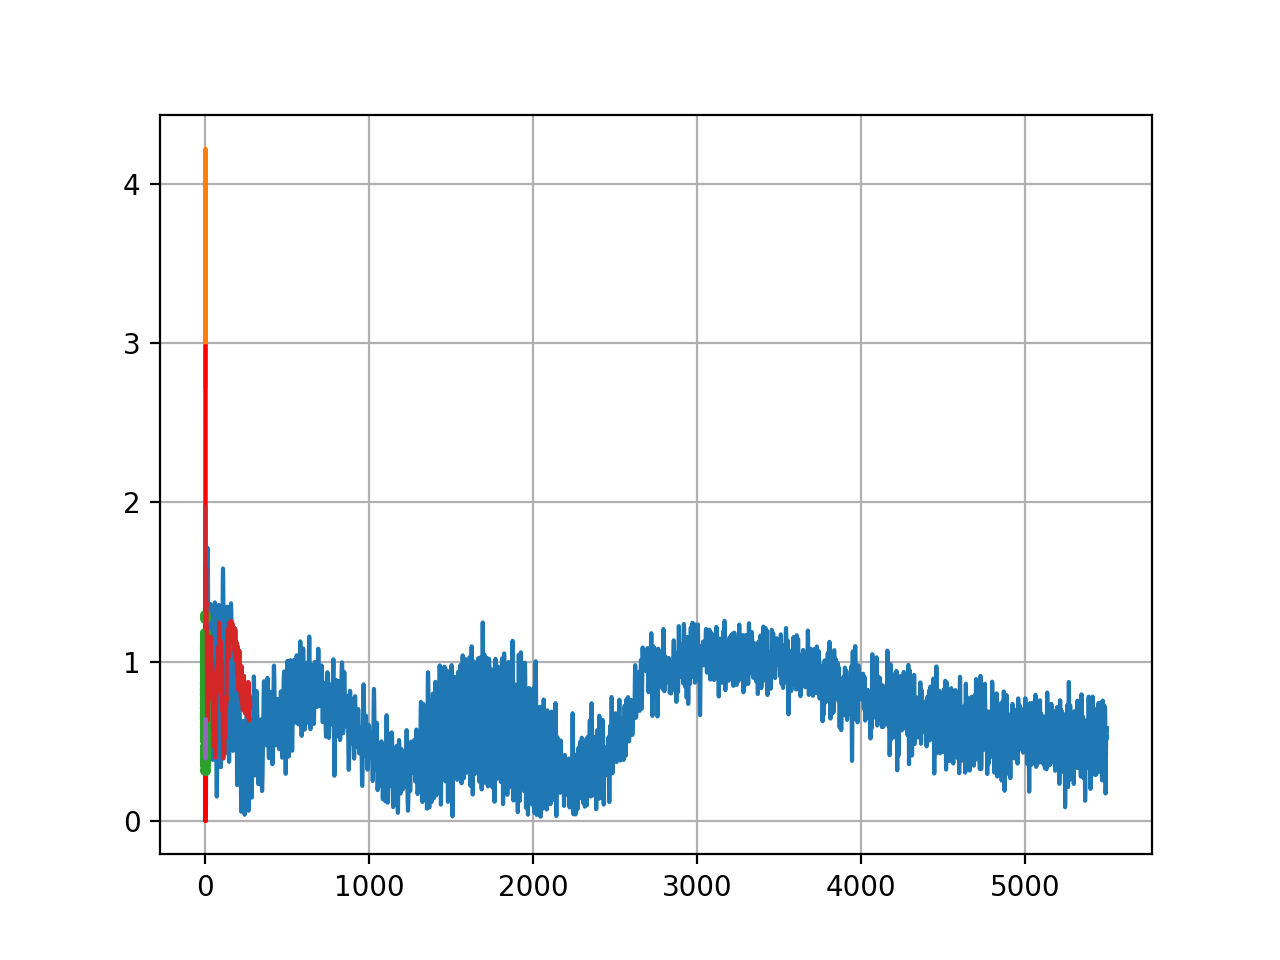

In [151]:
plt.figure()
plt.plot(abs(filtered)[0:5500])
abs(filtered)[0:5500].shape
plt.show()

<IPython.core.display.Javascript object>


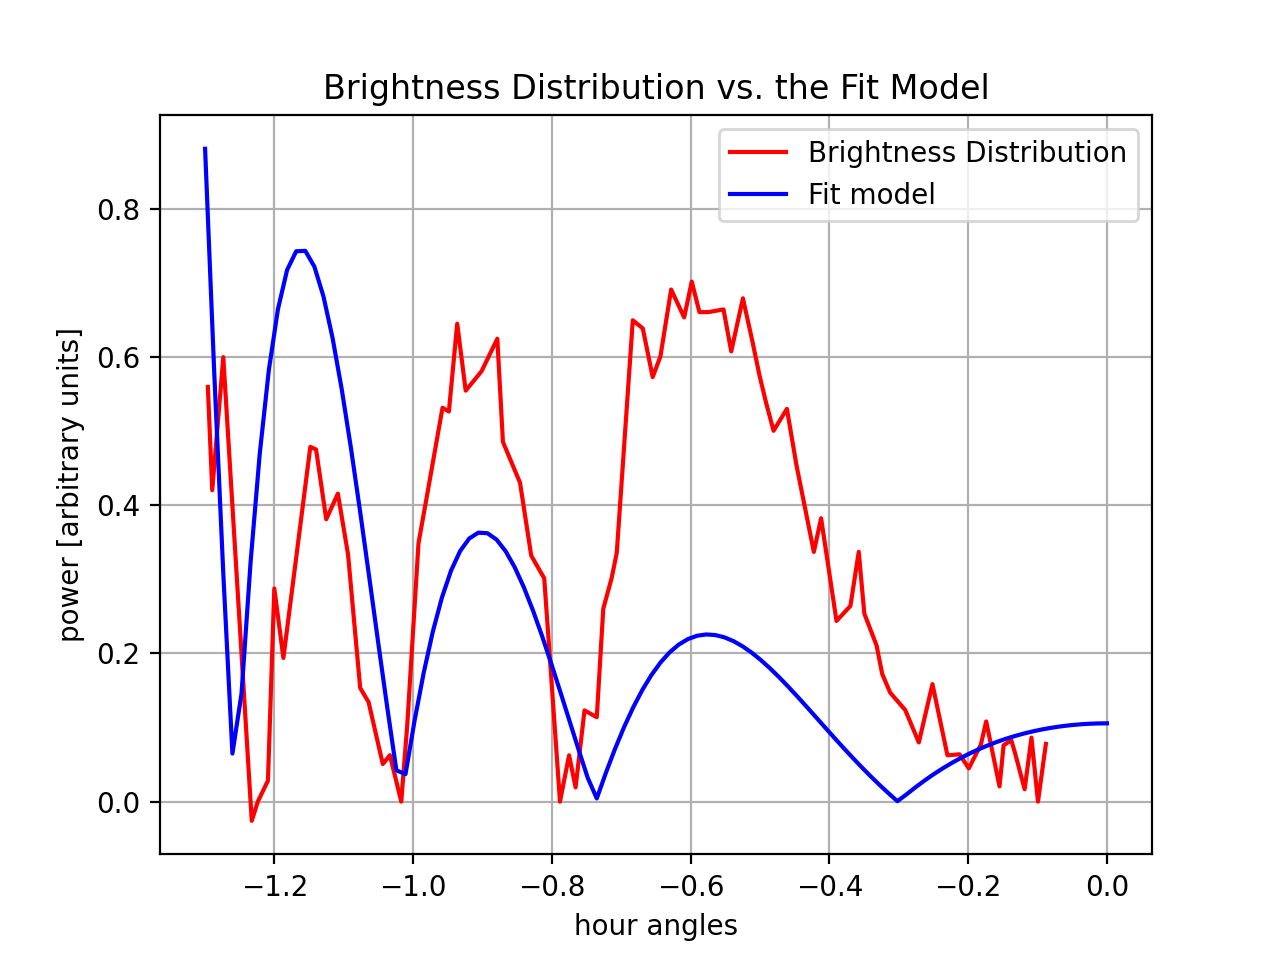

/Users/orkidehkhoshsorour/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


0.248292484138594
648292.7657869027 km
diameter 1296585.5315738055
error 0.24889391853623055
1.1757681230981574


In [370]:
from scipy.signal import argrelmin
cutdata = abs(filtered)[0:5500]
cuthas = has[0:5500]
chunks = np.split(cutdata, 275)
has_chuncks = np.split(cuthas, 275)
# print(has_chuncks[0])
# print('has', np.array(has_chuncks).shape)
maxim = np.argmax(chunks, axis = 1) #hour angle maximums
# print('max',type(maxim))
maxhas = []
for i, m in enumerate(maxim):
    mhas = has_chuncks[i][m]
    maxhas.append(mhas)
maxhas = np.array(maxhas)

powermax = np.max(chunks, axis =1) #y values maximum

# minhas = scipy.signal.argrelmin(np.array(maxhas))
minpower = scipy.signal.argrelmin(powermax)
# print('min has', minhas)
# print('min power', minpower)

minp = np.array([powermax[13],powermax[60],powermax[110],powermax[268]])
minh = np.array([maxhas[13],maxhas[60],maxhas[110],maxhas[268]])
# print('here',mindata)
# print(mindata)


plt.figure()


fit = np.polyfit(minh,minp,4)

y = fit[0] * maxhas[minpower]**4 + fit[1] * maxhas[minpower] **3 + fit[2] * maxhas[minpower] **2 + fit[3] * maxhas[minpower] + fit[4]

plt.plot(maxhas[minpower],powermax[minpower] - y, color ='r', label = 'Brightness Distribution')

popt,pcov = curve_fit(bessel, maxhas[minpower], abs(powermax[minpower] - y), p0 = [0.005,10,1])
x = np.linspace(-1.3,0,100)
plt.plot(x, bessel(x,*popt), color = 'b', label = 'Fit model')
print(np.rad2deg(popt[0])) #in degrees

oneAU = 1.496e8 
sun_radius = oneAU*np.sin(popt[0]) 
print(sun_radius, 'km') 
print('diameter', sun_radius * 2)


plt.grid()
plt.xlabel('hour angles')
plt.ylabel('power [arbitrary units]')
plt.title('Brightness Distribution vs. the Fit Model')
plt.legend()
plt.savefig("brightnessdistribution.png")
plt.show()

#chi-squared
def chisquare(x,y,error,model,param):
    predicted = model(x,*param)
    error = [((y[i] - predicted[i]) **2 / (error **2)) for i in range(len(y))]
    return np.sum(error)

resdi = (powermax[minpower] - y) - bessel(maxhas[minpower], *popt)
error = np.std(resdi)
print('error',error)
a  = chisquare(maxhas[minpower],powermax[minpower] - y, error,bessel, popt)
print(a / len(powermax[minpower] - y)) 
#when doing -y, subtracitng a little too much from the actual graph so why the amplitudes are backwards

/Users/orkidehkhoshsorour/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


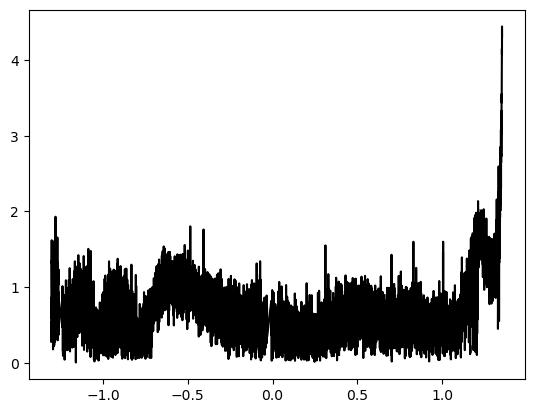

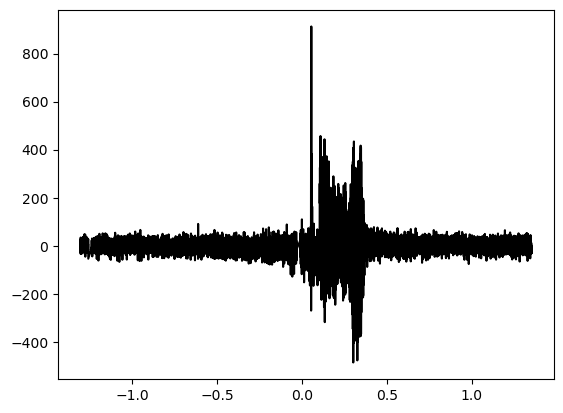

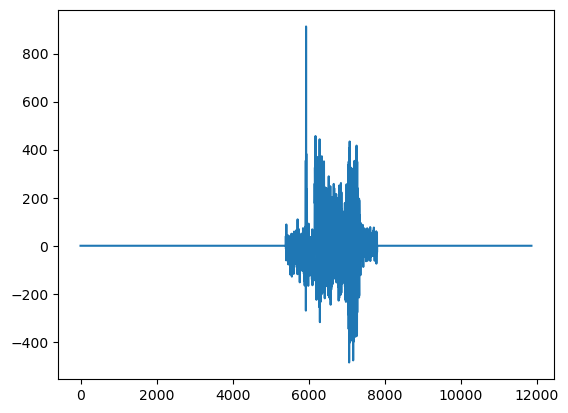

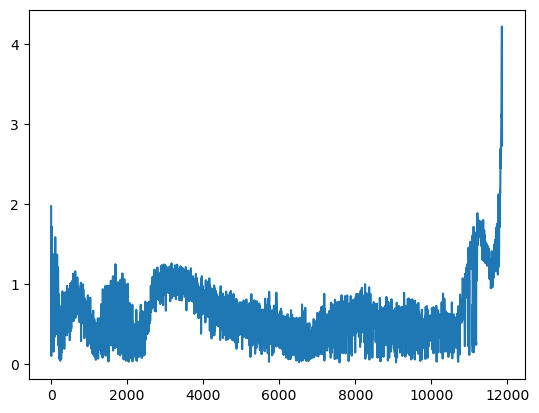

In [66]:
plt.figure()
plt.plot(has,np.abs(fullsundata[:,600]), color ='black')
plt.figure()
plt.plot(has,np.fft.fftshift(np.fft.fft(fullsundata[:,600])), color ='black')

fftdata = np.fft.fftshift(np.fft.fft(fullsundata[:,600]))
for i,freq in enumerate(fftdata):
    if i < 5400 or i > 7800:
        fftdata[i] = 0+0j
plt.figure()
plt.plot(fftdata)
filtered = np.fft.ifft(fftdata)
plt.figure()
plt.plot(abs(filtered))

# 9.4

[0.00641747 0.00863679]


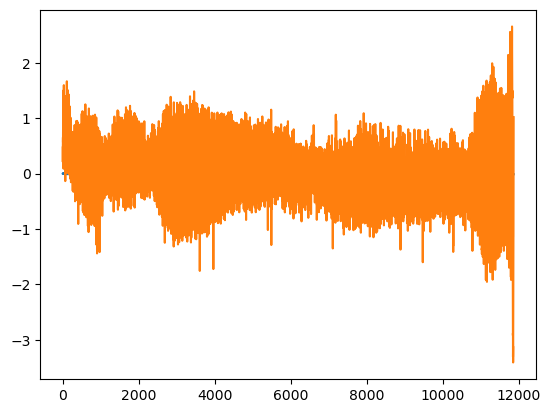

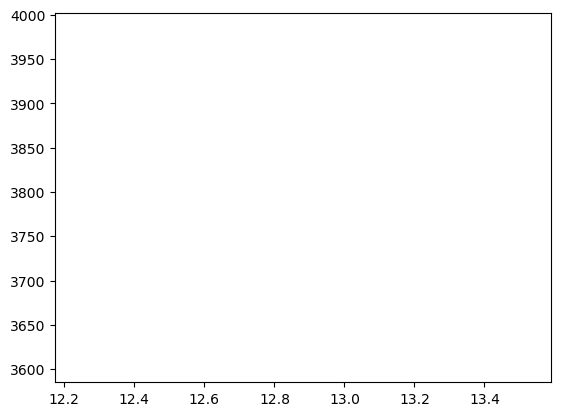

In [67]:
bews = [12.88222443]
bns = 1.39485794

def FA(nutg, a, b):
    return a*np.cos(2*np.pi*nutg) + b*np.sin(2*np.pi*nutg)

squaredress = []

for bew in bews:
    Qew = bew*np.cos(decs)/lamb
    Qns = bns*np.sin(L)*np.cos(decs)/lamb
    nutg = Qew*np.sin(has) + Qns*np.cos(has)
    nutg = nutg[:]
    
    # Now fit the curve
    popt, pcov = curve_fit(FA, nutg, vis[:,600].real, p0 = [0.0003, 0.0003])
    print(popt)
    yfit = FA(nutg, *popt)
    squaredres = np.sum((yfit - vis[:,600].real)**2)
    squaredress.append(squaredres)
    plt.plot(yfit)
plt.plot(vis[:,600].real)

plt.figure()
plt.plot(bews,squaredress)
plt.show()